In [49]:

import matplotlib.pyplot as plt
import numpy as np
# from keras import layers, models
import tensorflow as tf
import os
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


In [50]:
classifiedDataset = r"D:\MS Computer Engineering\Semester 1\CV\classified_dataset/"

In [51]:
images=[]
labels=[]
for folders in os.listdir(classifiedDataset):
    for files in os.listdir(classifiedDataset+folders):
        img=cv2.imread(classifiedDataset+'/'+folders+r'/'+files,0)/255
        img=cv2.resize(img,(128,128))
        img.shape=(128,128,1)
        images.append(img)
        labels.append(folders)
images=np.array(images)
labels=np.array(labels)  

# labels = np.array(['0','1','2','3','4','5','6','7','8','9','10'])


In [52]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(128,128,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(56, activation='softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 62, 62, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 58, 58, 32)        51232     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 32)       

In [53]:
# from sklearn.preprocessing import OneHotEncoder
y_labels=to_categorical(labels)
# print(y_labels)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.33, random_state=42)
keras.initializers.lecun_uniform(seed=None)
print(X_train.shape)
print(y_train.shape)

# print(training.shape)
# print(testing.shape)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)

# fits the model on batches with real-time data augmentation:
# model.fit_generator(datagen.flow(X_train, y_train, batch_size=320),
                #    steps_per_epoch=len(X_train) / 32, epochs=20)
fitOfModel = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=200, verbose=1)
scores = model.evaluate(images, y_labels, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

(2043, 128, 128, 1)
(2043, 56)
Epoch 1/50
21/21 [==============================] - 40s 2s/step - loss: 2.8432 - accuracy: 0.0910 - val_loss: 2.6360 - val_accuracy: 0.0993
Epoch 2/50
21/21 [==============================] - 38s 2s/step - loss: 2.4657 - accuracy: 0.0940 - val_loss: 2.4818 - val_accuracy: 0.0924
Epoch 3/50
21/21 [==============================] - 37s 2s/step - loss: 2.4166 - accuracy: 0.1175 - val_loss: 2.3969 - val_accuracy: 0.1420
Epoch 4/50
21/21 [==============================] - 38s 2s/step - loss: 1.9755 - accuracy: 0.3319 - val_loss: 1.4178 - val_accuracy: 0.5472
Epoch 5/50
21/21 [==============================] - 37s 2s/step - loss: 1.0379 - accuracy: 0.6383 - val_loss: 0.7913 - val_accuracy: 0.7517
Epoch 6/50
21/21 [==============================] - 37s 2s/step - loss: 0.6314 - accuracy: 0.7861 - val_loss: 0.5911 - val_accuracy: 0.8073
Epoch 7/50
21/21 [==============================] - 38s 2s/step - loss: 0.4653 - accuracy: 0.8429 - val_loss: 0.4097 - val_accura

In [55]:
model.save(r"D:\MS Computer Engineering\Semester 1\CV\Final Project\tamil_characters_CNN.h5")

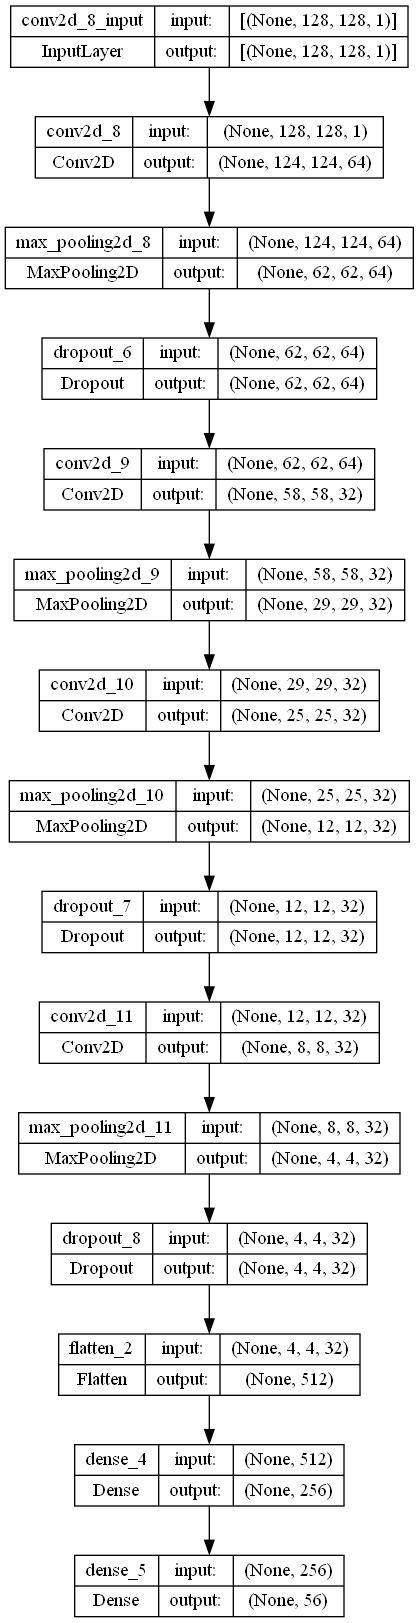

In [56]:
tf.keras.utils.plot_model(model, 'my_first_model.png', show_shapes=True)

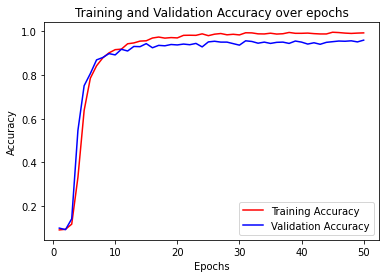

In [61]:
xaxis = range(1, len(fitOfModel.history['accuracy'])+1)

plt.plot(xaxis, fitOfModel.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(xaxis, fitOfModel.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Training and Validation Accuracy over epochs')
plt.legend()
plt.show()

In [57]:
from keras.models import load_model
model = load_model(r"D:\MS Computer Engineering\Semester 1\CV\Final Project\tamil_characters_CNN.h5")

In [58]:
unicode = [u'\u0B85',u'\u0B86',u'\u0B87',u'\u0B88',u'\u0B89',u'\u0B8A',u'\u0B8E',u'\u0B8F',u'\u0B90',u'\u0B92',u'\u0B93',u'\u0B94']
print(unicode)

['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஔ']


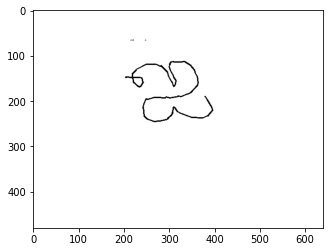

1/1 [==============================] - 0s 61ms/step
ஐ


In [59]:
img = cv2.imread(r"D:\MS Computer Engineering\Semester 1\CV\testing_dataset\8\7d7f5841-6e01-11ed-8e46-5c879ca2e7ab.jpg")
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,dsize = (128,128))
img = img.reshape(-1,128,128,1)
prediction = model.predict([img])
print(unicode[np.argmax(prediction)])
